In [1]:
from numpy import *
from numba import njit

@njit
def MandelLyap(z0, max_steps):
    z = 0j
    Lambda = 0
    for itr in range(max_steps):
        z = z*z + z0
        Lambda += log(abs(2*z))
        if abs(z)>2:
            Lambda /= (itr + 1)
            # you might be able to change the limit where, instead of abs(2), you could do abs(10^30) or something lol.
            # Lyapunov exponent outside of the set becomes hard to define
            return Lambda
    Lambda /= (max_steps + 1)
    return Lambda
# It is only doing this for points inside the set

@njit
def Mandelbrot(ext, Nxy, max_steps):
    data = zeros((Nxy,Nxy))
    for i in range(Nxy):
        for j in range(Nxy):
            x = ext[0] + (ext[1]-ext[0])*i/(Nxy-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Nxy-1.)
            data[i,j] = MandelLyap(x + y*1j, max_steps)
    return data

In [2]:
data = Mandelbrot([-2,1,-1,1], 500, 1000)

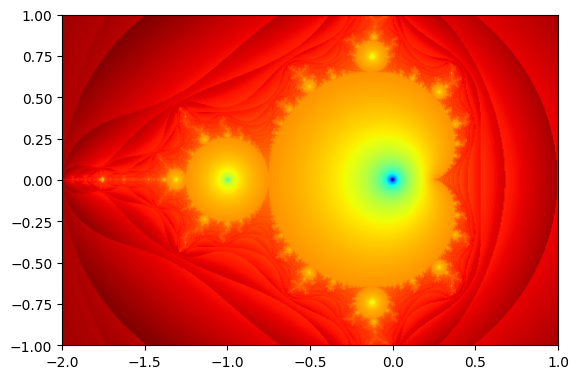

In [3]:
from pylab import *

im=plt.imshow(data.T, extent=[-2,1,-1,1], cmap=cm.jet, origin='lower')